In [7]:
import sys
sys.path.append('/home/kai/DAST/network')
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import torch.utils.data.dataloader as Data
import os
import time
from torch.autograd import Variable
from DAST_utils import *
from DAST_Network import *
from torch.utils.data import TensorDataset,DataLoader
import sys
from tqdm import tqdm
import math
import seaborn as sns
from scipy.stats import pearsonr

In [54]:
class FeatureCorrelation:
    def __init__(self, FOLDER) -> None:
        self.DATA_PATH = '../../../data/10FEMTO/processed_data/'
        self.FOLDER = FOLDER
        self.X = np.load(f'{self.DATA_PATH}/{FOLDER}/{FOLDER}_train_X.npy')[:, 0, :]
        self.Y = np.load(f'{self.DATA_PATH}/{FOLDER}/{FOLDER}_train_Y.npy')
        self.LABEL = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','y']
    
    def feat_correlation(self):
        correlations = []
        correlation = []
        for i in range(self.X.shape[1]):
            correlation = []
            for j in range(self.X.shape[1]):
                corr, _ = pearsonr(self.X[:, i], self.X[:, j])
                corr = round(corr, 1)
                correlation.append(corr)
            
            corr, _ = pearsonr(self.X[:, i], self.Y)
            corr = round(corr, 1)
            correlation.append(corr)
            correlations.append(correlation)
            
        y_feature = np.array([-1, -1, -1, -1, -1, -1, -1, -1,-1, -1, -1, -1,-1, -1, -1, -1,-1])
        correlations.append(y_feature)
        _, ax = plt.subplots(figsize=(10,10))
        sns.heatmap(correlations, cmap="YlGnBu", xticklabels=self.LABEL, yticklabels=self.LABEL, annot=True, ax=ax)
        plt.show()

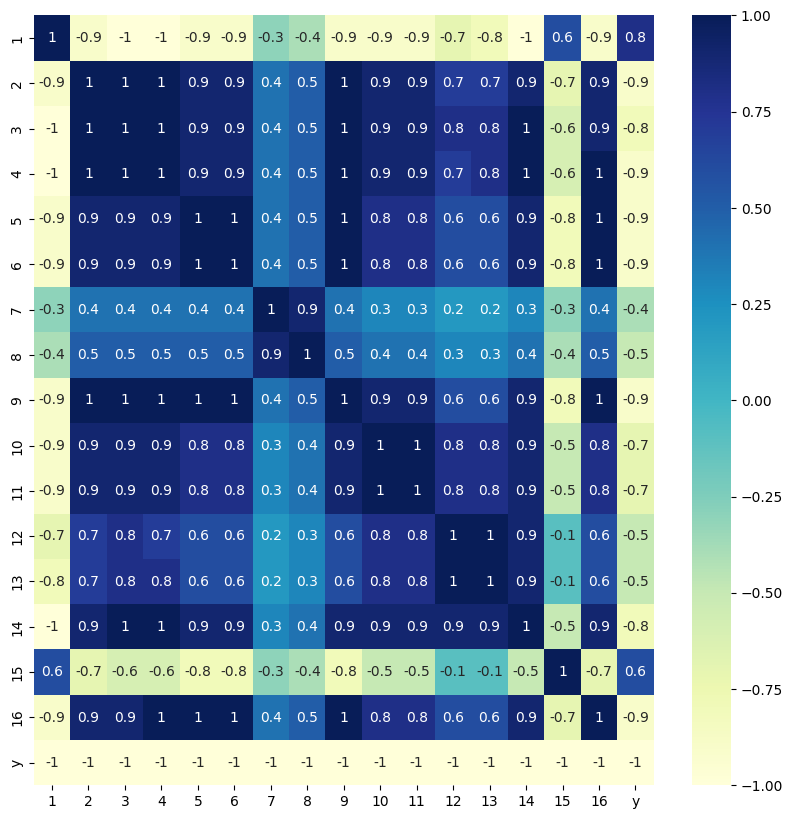

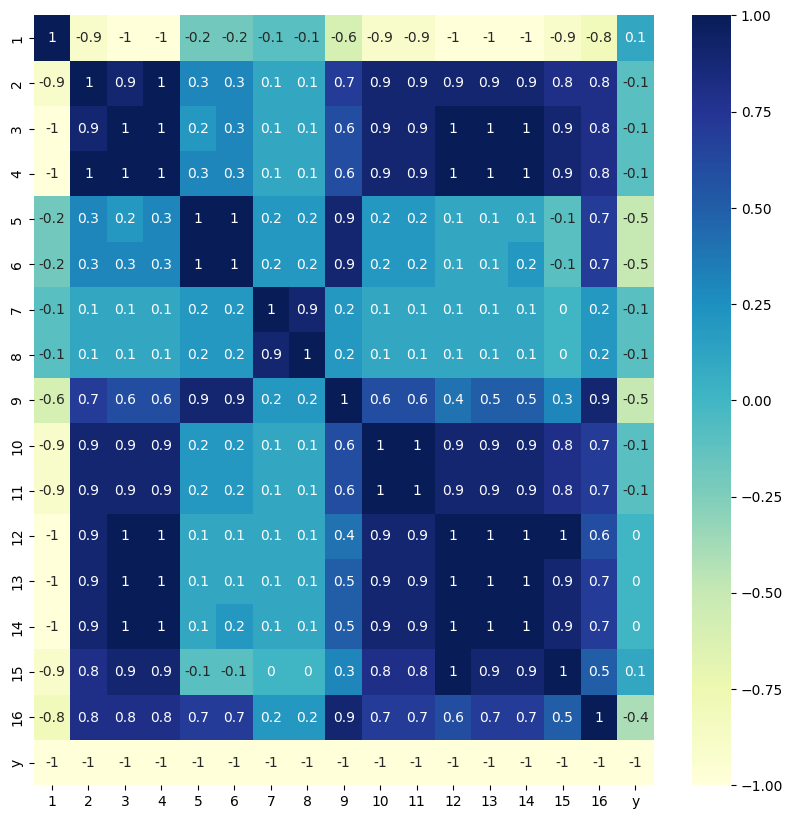

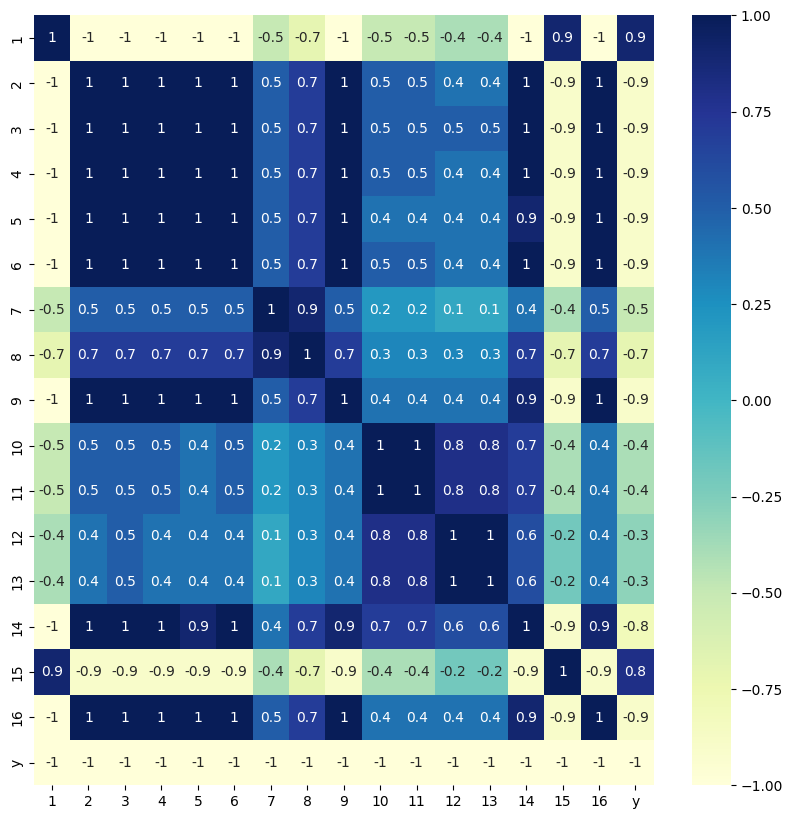

In [57]:
for i in [1, 2, 4]:
    f = FeatureCorrelation(f'Bearing1_{i}')
    feat_dict = f.feat_correlation()